# Install Libraries

In [1]:
# !pip install pandas matplotlib seaborn scikit-learn

# Import Libraries

In [2]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid', palette='muted')

# Loading Data

In [3]:
# Load datasets
customers_path = "Customers.csv"
products_path = "Products.csv"
transactions_path = "Transactions.csv"

try:
    customers = pd.read_csv(customers_path)
    products = pd.read_csv(products_path)
    transactions = pd.read_csv(transactions_path)
    print("Datasets loaded successfully!")
except Exception as e:
    print(f"Error loading datasets: {e}")

Datasets loaded successfully!


In [4]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [6]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


# Exploratory Data Analysis for Customers Data

In [7]:
df1 = customers

In [8]:
df1.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [10]:
df1.describe()

,CustomerID,CustomerName,Region,SignupDate
count,200,200,200,200
unique,200,200,4,179
top,C0001,Lawrence Carroll,South America,2022-04-16
freq,1,1,59,3


In [11]:
print("\nMissing values per column:")
print(df1.isnull().sum())


Missing values per column:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [12]:
print(df1.size)
print(df1.shape)

800
(200, 4)


In [13]:
print("\nDuplicate rows:", df1.duplicated().sum())


Duplicate rows: 0


In [14]:
# Unique customers check
print("\nUnique CustomerIDs:", customers['CustomerID'].nunique())


Unique CustomerIDs: 200


In [15]:
# Region distribution
region_counts = customers['Region'].value_counts()
print("\nRegion distribution:")
print(region_counts)


Region distribution:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


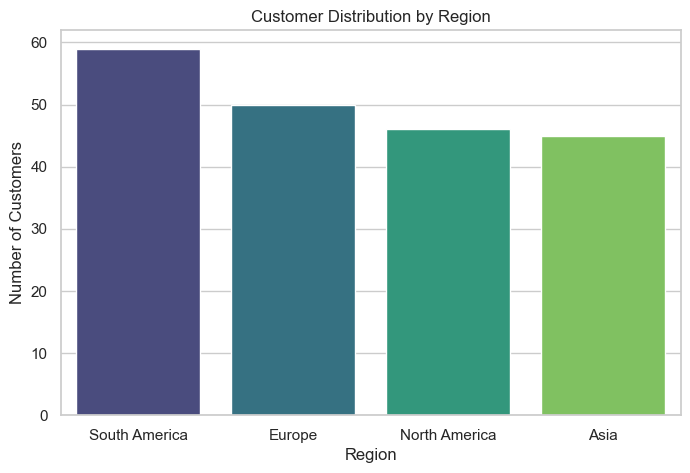

In [16]:
# Plot region distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Signup trends over time
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])  # Convert to datetime
signup_trends = customers['SignupDate'].dt.to_period('M').value_counts().sort_index()
print("\nSignup trends:")
print(signup_trends)


Signup trends:
SignupDate
2022-01     1
2022-02     7
2022-03     8
2022-04     8
2022-05     8
2022-06     5
2022-07     4
2022-08     4
2022-09     6
2022-10     3
2022-11     3
2022-12     7
2023-01     5
2023-02     6
2023-03     8
2023-04     6
2023-05     3
2023-06     3
2023-07     3
2023-08     2
2023-09     4
2023-10     7
2023-11     5
2023-12     5
2024-01     9
2024-02     8
2024-03     4
2024-04    10
2024-05     6
2024-06     4
2024-07     6
2024-08     4
2024-09    11
2024-10     5
2024-11    11
2024-12     1
Freq: M, Name: count, dtype: int64


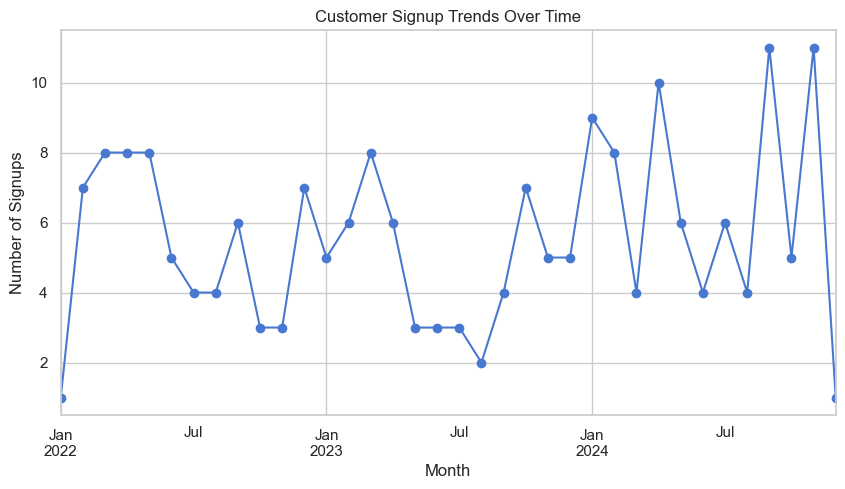

In [18]:
# Plot signup trends
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o', color='b')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.grid(True)
plt.show()


Signups by Month:
SignupMonth
1     15
2     21
3     20
4     24
5     17
6     12
7     13
8     10
9     21
10    15
11    19
12    13
Name: count, dtype: int64


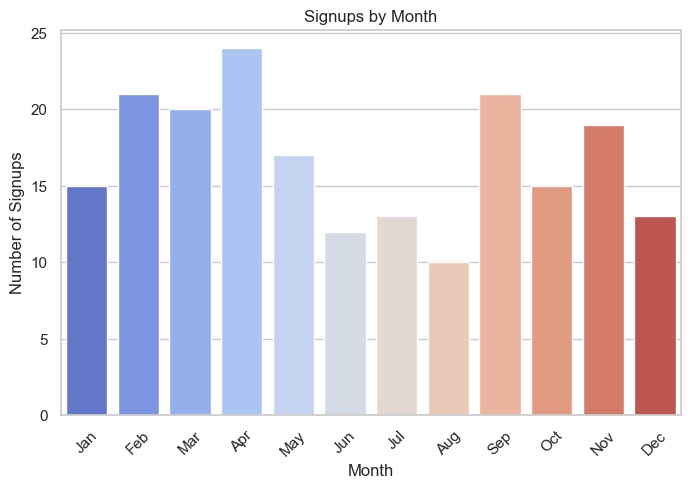

In [19]:
customers['SignupMonth'] = customers['SignupDate'].dt.month
signup_by_month = customers['SignupMonth'].value_counts().sort_index()
print("\nSignups by Month:")
print(signup_by_month)

# Plot signups by month
plt.figure(figsize=(8, 5))
sns.barplot(x=signup_by_month.index, y=signup_by_month.values, palette='coolwarm')
plt.title('Signups by Month')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.xticks(ticks=range(0, 12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


Signup trends by region over time:
Region      Asia  Europe  North America  South America
SignupDate                                            
2022-01      NaN     NaN            NaN            1.0
2022-02      3.0     2.0            1.0            1.0
2022-03      3.0     2.0            2.0            1.0
2022-04      1.0     1.0            3.0            3.0
2022-05      NaN     2.0            2.0            4.0
2022-06      1.0     2.0            1.0            1.0
2022-07      NaN     NaN            NaN            4.0
2022-08      2.0     2.0            NaN            NaN
2022-09      1.0     1.0            NaN            4.0
2022-10      1.0     1.0            NaN            1.0
2022-11      1.0     NaN            NaN            2.0
2022-12      NaN     3.0            1.0            3.0
2023-01      1.0     2.0            NaN            2.0
2023-02      2.0     3.0            NaN            1.0
2023-03      NaN     3.0            1.0            4.0
2023-04      1.0     NaN     

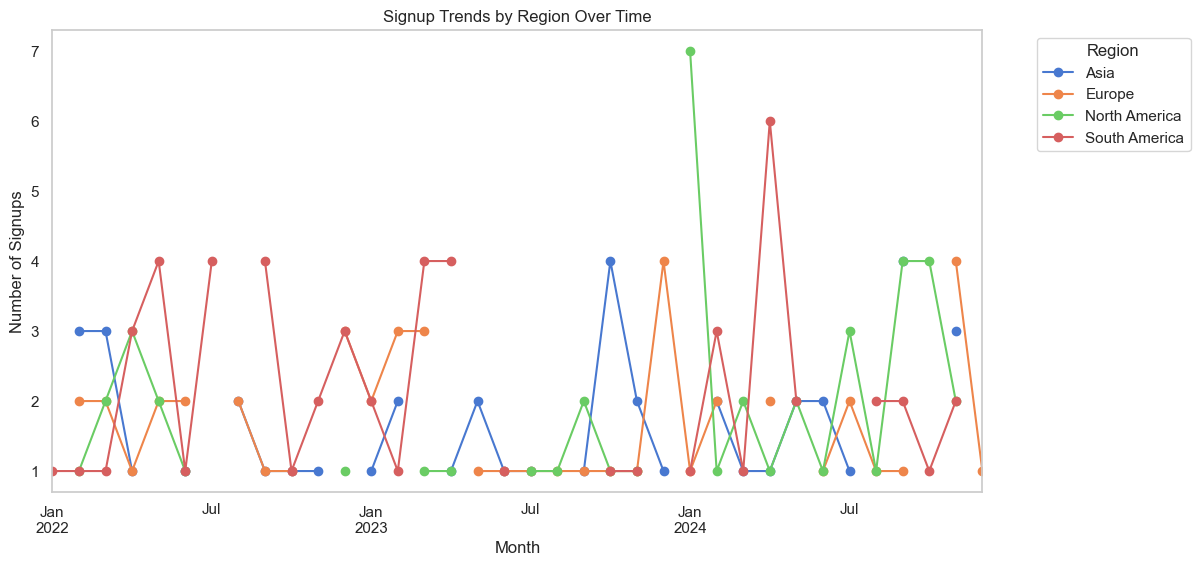

In [20]:
signup_region_trend = customers.groupby([customers['SignupDate'].dt.to_period('M'), 'Region'])['CustomerID'].count().unstack()
print("\nSignup trends by region over time:")
print(signup_region_trend)

# Plot
signup_region_trend.plot(figsize=(12, 6), marker='o')
plt.title('Signup Trends by Region Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


Percentage of Customers by Region:
Region
South America    29.5
Europe           25.0
North America    23.0
Asia             22.5
Name: count, dtype: float64


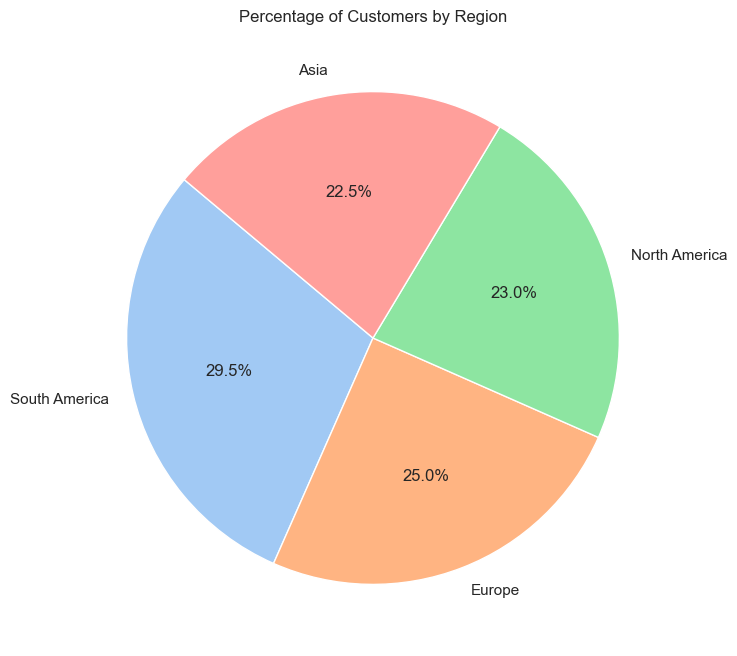

In [21]:
region_percentage = (region_counts / len(customers) * 100).round(2)
print("\nPercentage of Customers by Region:")
print(region_percentage)

# Pie chart
plt.figure(figsize=(8, 8))
region_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Percentage of Customers by Region')
plt.ylabel('')
plt.show()



Signups by Year:
SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


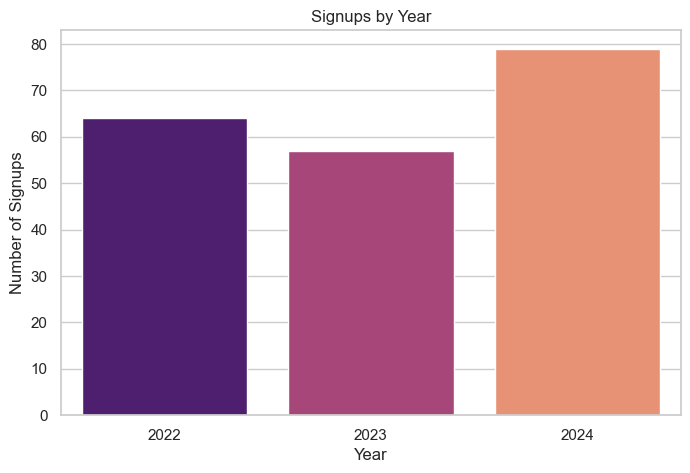

In [22]:
signup_by_year = customers['SignupDate'].dt.year.value_counts().sort_index()
print("\nSignups by Year:")
print(signup_by_year)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=signup_by_year.index, y=signup_by_year.values, palette='magma')
plt.title('Signups by Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()



Recent Signups by Region:
Region
North America    36
South America    34
Europe           34
Asia             32
Name: count, dtype: int64


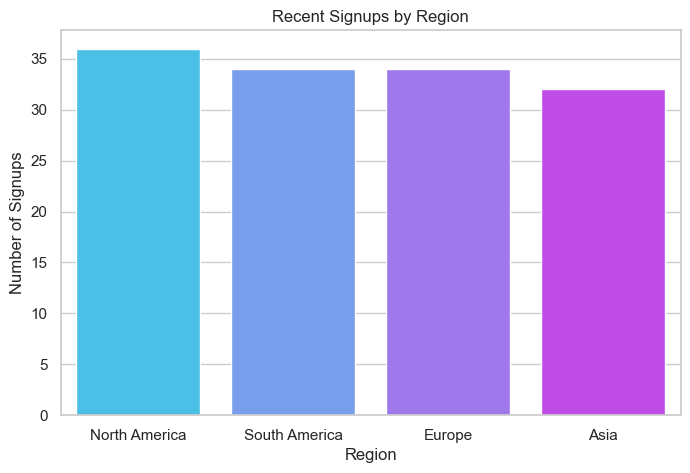

In [23]:
recent_signups = customers[customers['SignupDate'] >= '2023-01-01']  # Change this date as needed
recent_region_counts = recent_signups['Region'].value_counts()
print("\nRecent Signups by Region:")
print(recent_region_counts)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=recent_region_counts.index, y=recent_region_counts.values, palette='cool')
plt.title('Recent Signups by Region')
plt.xlabel('Region')
plt.ylabel('Number of Signups')
plt.show()


# Exploratory Data Analysis for Products Data

In [24]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [25]:
print("Products dataset:")
print(products.info())

Products dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [26]:
products.describe()

,Price
count,100.000000
mean,267.551700
std,143.219383
min,16.080000
25%,147.767500
50%,292.875000
75%,397.090000
max,497.760000


In [27]:
print("\nMissing values per column:")
print(products.isnull().sum())


Missing values per column:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [28]:
print("\nDuplicate rows:", products.duplicated().sum())


Duplicate rows: 0


In [29]:
# Unique product check
print("\nUnique ProductIDs:", products['ProductID'].nunique())
print("\nUnique Categories:", products['Category'].nunique())


Unique ProductIDs: 100

Unique Categories: 4



Category distribution:
Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


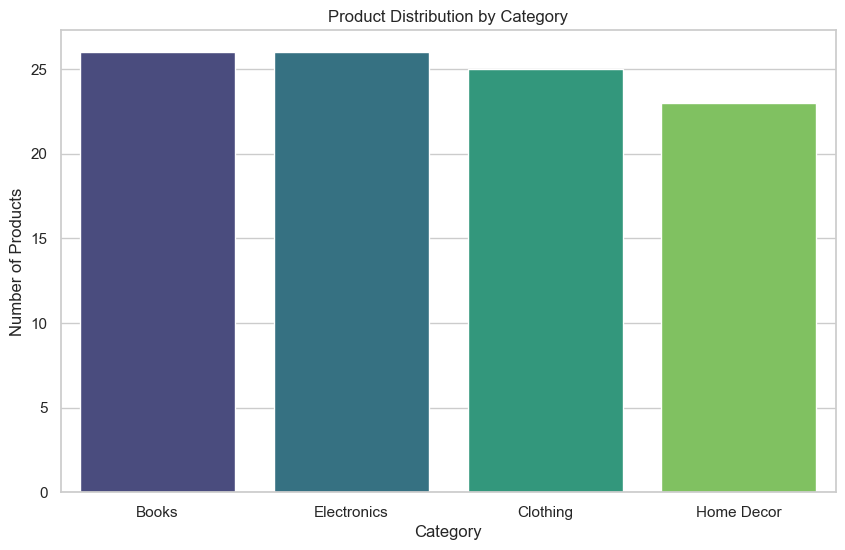

In [30]:
# Category distribution
category_counts = products['Category'].value_counts()
print("\nCategory distribution:")
print(category_counts)

# Plot category distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Product Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.show()


Price Statistics:
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


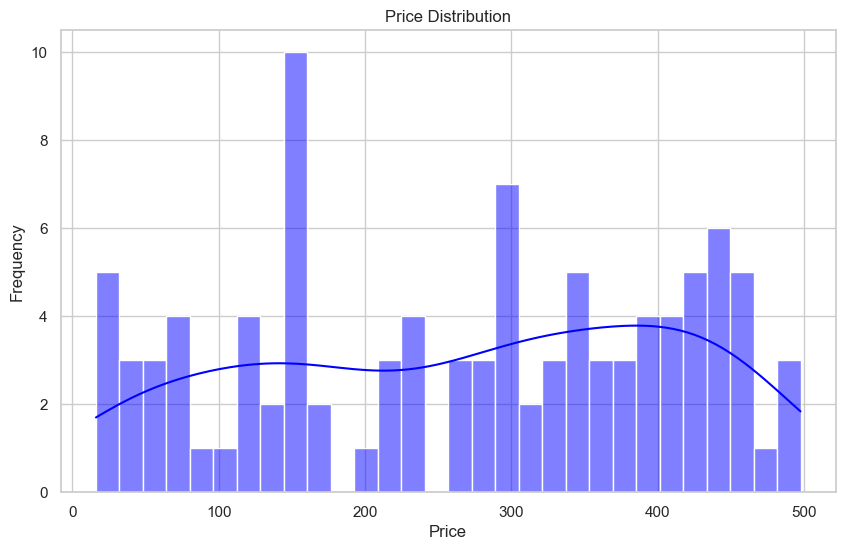


Top 5 Most Expensive Products:
   ProductID           ProductName     Category   Price
74      P075      TechPro Textbook        Books  497.76
31      P032    BookWorld Cookbook        Books  488.63
44      P045     SoundWave T-Shirt     Clothing  481.78
16      P017   ActiveWear Textbook        Books  469.77
36      P037  SoundWave Smartwatch  Electronics  459.86

Top 5 Cheapest Products:
   ProductID               ProductName     Category  Price
55      P056      SoundWave Smartwatch  Electronics  16.08
43      P044  ActiveWear Running Shoes     Clothing  18.82
13      P014         ActiveWear Jacket     Clothing  26.26
72      P073      ComfortLiving Laptop  Electronics  26.99
34      P035        ActiveWear T-Shirt     Clothing  30.59


In [31]:
# Price statistics
print("\nPrice Statistics:")
print(products['Price'].describe())

# Plot price distribution
plt.figure(figsize=(10, 6))
sns.histplot(products['Price'], kde=True, color='blue', bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Check for products with highest and lowest prices
highest_price_products = products.sort_values(by='Price', ascending=False).head(5)
lowest_price_products = products.sort_values(by='Price').head(5)
print("\nTop 5 Most Expensive Products:")
print(highest_price_products)
print("\nTop 5 Cheapest Products:")
print(lowest_price_products)


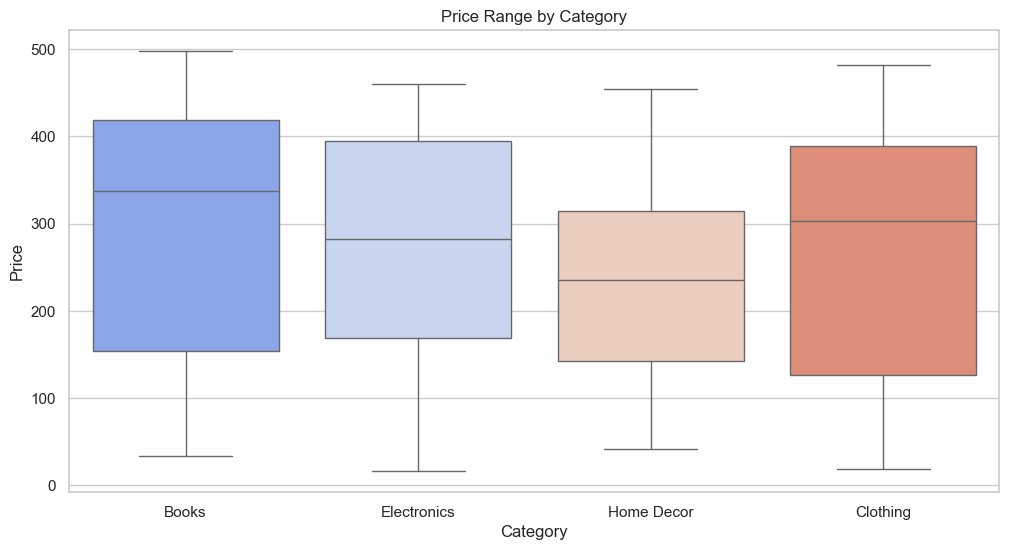

In [32]:
# Price range by category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Price', data=products, palette='coolwarm')
plt.title('Price Range by Category')
plt.xlabel('Category')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()


Average Price by Category:
Category
Books          292.212308
Electronics    275.353462
Clothing       263.720000
Home Decor     235.020000
Name: Price, dtype: float64


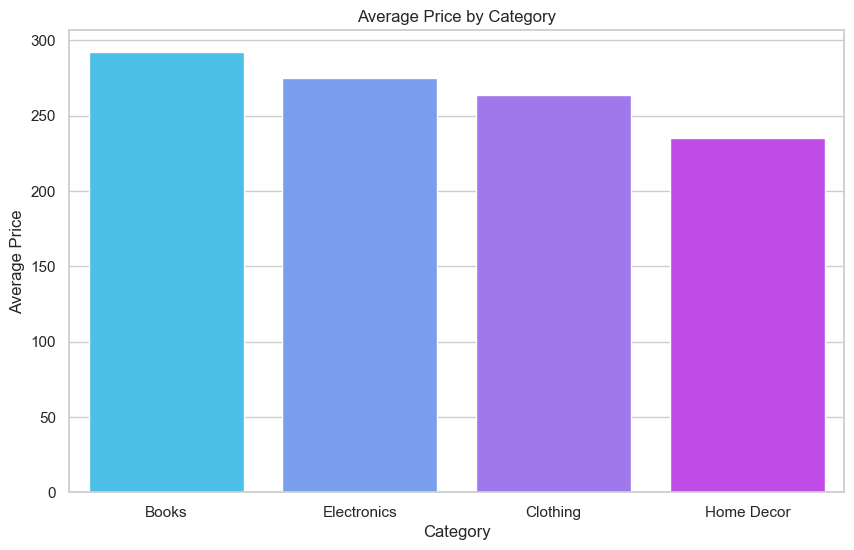

In [33]:
# Average price by category
avg_price_by_category = products.groupby('Category')['Price'].mean().sort_values(ascending=False)
print("\nAverage Price by Category:")
print(avg_price_by_category)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_price_by_category.index, y=avg_price_by_category.values, palette='cool')
plt.title('Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.show()


Total Value by Category:
Category
Books          7597.52
Electronics    7159.19
Clothing       6593.00
Home Decor     5405.46
Name: Price, dtype: float64


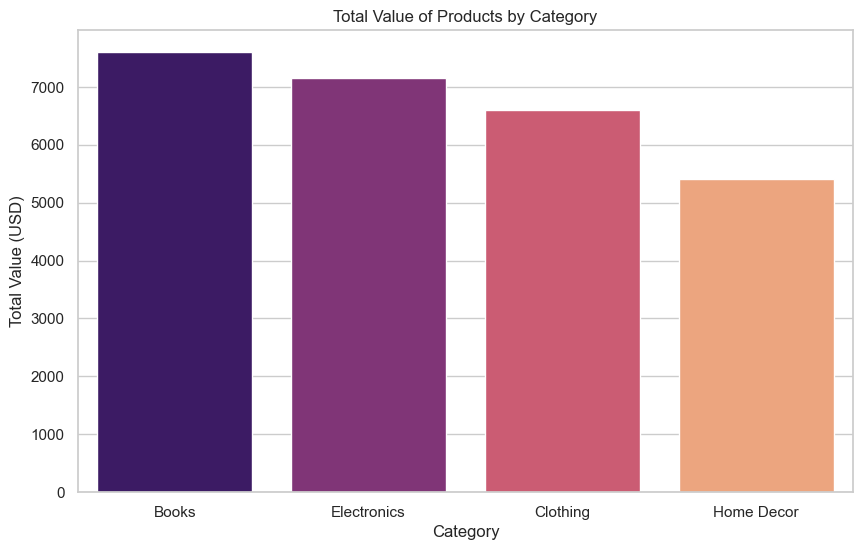

In [34]:
# Total value by category
total_value_by_category = products.groupby('Category')['Price'].sum().sort_values(ascending=False)
print("\nTotal Value by Category:")
print(total_value_by_category)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=total_value_by_category.index, y=total_value_by_category.values, palette='magma')
plt.title('Total Value of Products by Category')
plt.xlabel('Category')
plt.ylabel('Total Value (USD)')
plt.xticks(rotation=0)
plt.show()


In [35]:
# Define thresholds for top and bottom 5%
lower_threshold = products['Price'].quantile(0.05)
upper_threshold = products['Price'].quantile(0.95)

# Products with prices in top and bottom 5%
high_priced_products = products[products['Price'] > upper_threshold]
low_priced_products = products[products['Price'] < lower_threshold]
print("\nProducts in Top 5% Price Range:")
print(high_priced_products)
print("\nProducts in Bottom 5% Price Range:")
print(low_priced_products)


Products in Top 5% Price Range:
   ProductID           ProductName     Category   Price
16      P017   ActiveWear Textbook        Books  469.77
31      P032    BookWorld Cookbook        Books  488.63
36      P037  SoundWave Smartwatch  Electronics  459.86
44      P045     SoundWave T-Shirt     Clothing  481.78
74      P075      TechPro Textbook        Books  497.76

Products in Bottom 5% Price Range:
   ProductID               ProductName     Category  Price
13      P014         ActiveWear Jacket     Clothing  26.26
34      P035        ActiveWear T-Shirt     Clothing  30.59
43      P044  ActiveWear Running Shoes     Clothing  18.82
55      P056      SoundWave Smartwatch  Electronics  16.08
72      P073      ComfortLiving Laptop  Electronics  26.99



Category Count vs Average Price:
      Category  Count    AvgPrice
0        Books     26  292.212308
1     Clothing     25  263.720000
2  Electronics     26  275.353462
3   Home Decor     23  235.020000


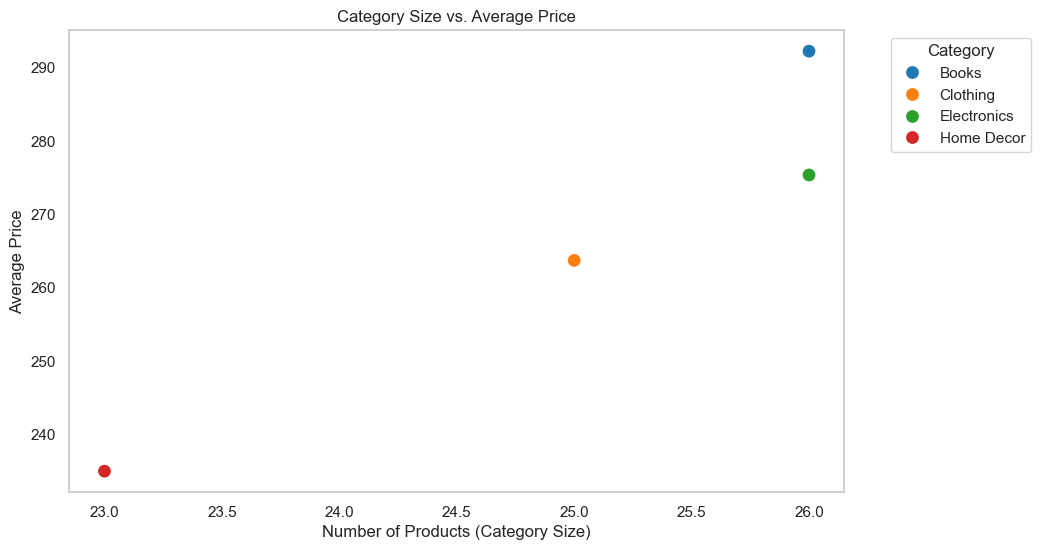

In [36]:
# Merge category count with average price
category_analysis = products.groupby('Category').agg({'ProductID': 'count', 'Price': 'mean'}).rename(columns={'ProductID': 'Count', 'Price': 'AvgPrice'}).reset_index()
print("\nCategory Count vs Average Price:")
print(category_analysis)

# Plot category count vs average price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Count', y='AvgPrice', data=category_analysis, hue='Category', palette='tab10', s=100)
plt.title('Category Size vs. Average Price')
plt.xlabel('Number of Products (Category Size)')
plt.ylabel('Average Price')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()


# Exploratory Data Analysis for Transactions Data

In [37]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [38]:
print("Transactions dataset:")
print(transactions.info())

Transactions dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [39]:
transactions.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


In [40]:
print("\nMissing values per column:")
print(transactions.isnull().sum())


Missing values per column:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [41]:
print("\nDuplicate rows:", transactions.duplicated().sum())


Duplicate rows: 0


In [42]:
# Unique count
print("\nUnique Transaction IDs:", transactions['TransactionID'].nunique())
print("Unique Customers:", transactions['CustomerID'].nunique())
print("Unique Products:", transactions['ProductID'].nunique())


Unique Transaction IDs: 1000
Unique Customers: 199
Unique Products: 100



Transaction counts by month:
TransactionDate
2023-12      4
2024-01    107
2024-02     77
2024-03     80
2024-04     86
2024-05     86
2024-06     69
2024-07     96
2024-08     94
2024-09     96
2024-10     70
2024-11     57
2024-12     78
Freq: M, Name: count, dtype: int64


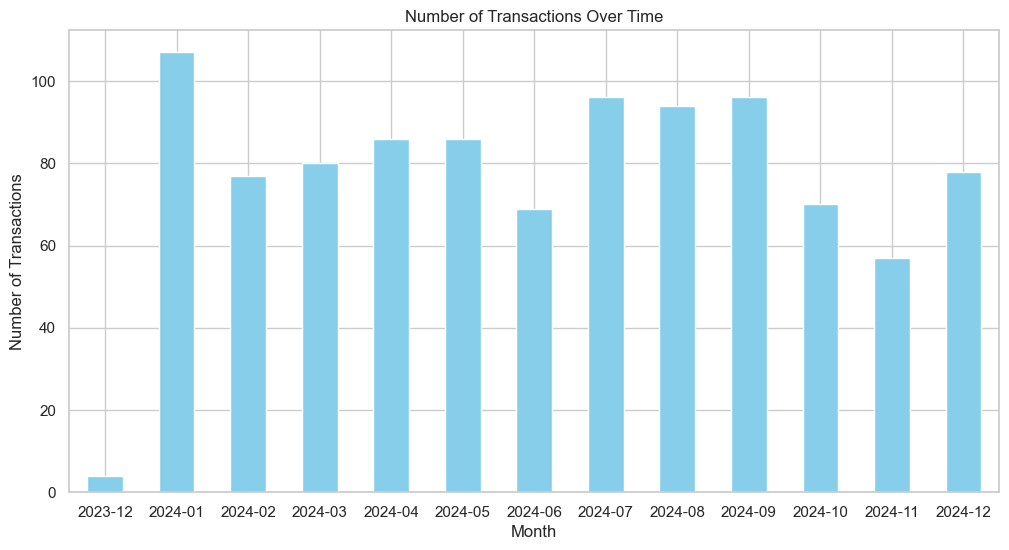

In [43]:
# Convert TransactionDate to datetime if not already done
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Transactions over time
transactions_over_time = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
print("\nTransaction counts by month:")
print(transactions_over_time)

# Plot
plt.figure(figsize=(12, 6))
transactions_over_time.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.show()



Total Revenue: $689,995.56
Average Revenue per Transaction: $690.00

Revenue over time:
TransactionDate
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


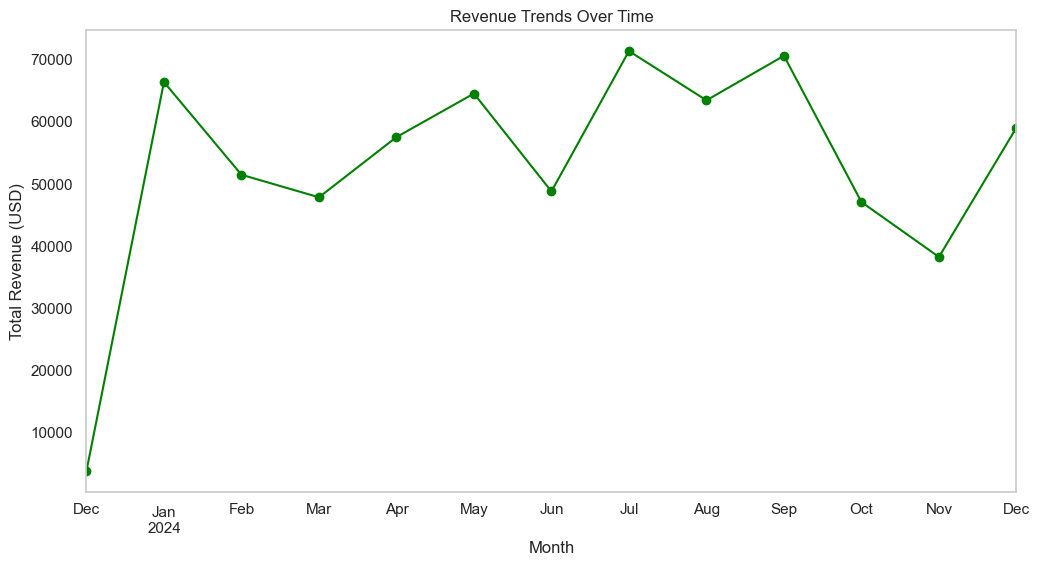

In [44]:
# Total revenue
total_revenue = transactions['TotalValue'].sum()
avg_revenue_per_transaction = transactions['TotalValue'].mean()
print(f"\nTotal Revenue: ${total_revenue:,.2f}")
print(f"Average Revenue per Transaction: ${avg_revenue_per_transaction:,.2f}")

# Revenue over time
revenue_over_time = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
print("\nRevenue over time:")
print(revenue_over_time)

# Plot revenue trends
plt.figure(figsize=(12, 6))
revenue_over_time.plot(kind='line', marker='o', color='green')
plt.title('Revenue Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()



Top 10 Customers by Spending:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


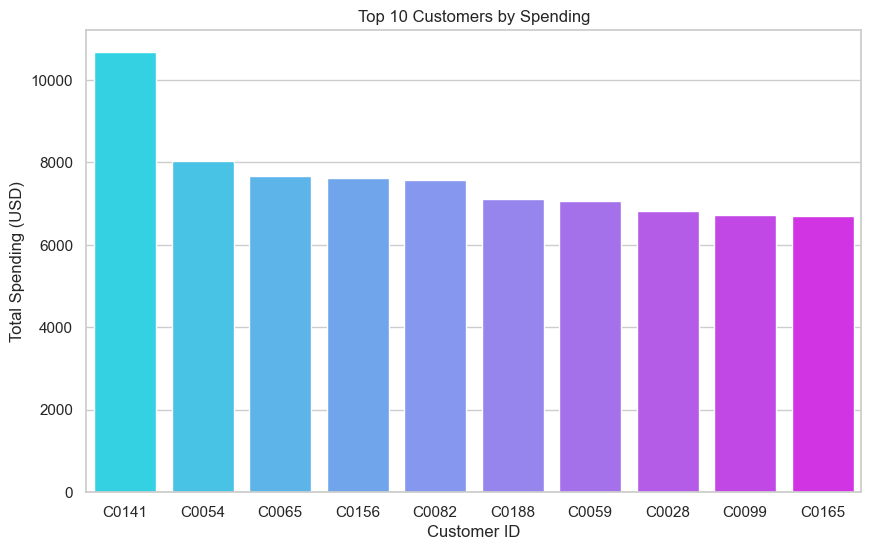

In [45]:
# Top customers by total spending
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Customers by Spending:")
print(top_customers)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='cool')
plt.title('Top 10 Customers by Spending')
plt.xlabel('Customer ID')
plt.ylabel('Total Spending (USD)')
plt.xticks(rotation=0)
plt.show()



Top 10 Products by Revenue:
ProductID
P029    19513.80
P079    17946.91
P048    17905.20
P020    15060.92
P062    14592.24
P059    13947.20
P039    13778.88
P083    13671.60
P019    13487.95
P041    13232.12
Name: TotalValue, dtype: float64

Top 10 Products by Quantity Sold:
ProductID
P054    46
P059    46
P029    45
P048    43
P057    43
P061    43
P079    43
P062    39
P020    38
P028    38
Name: Quantity, dtype: int64


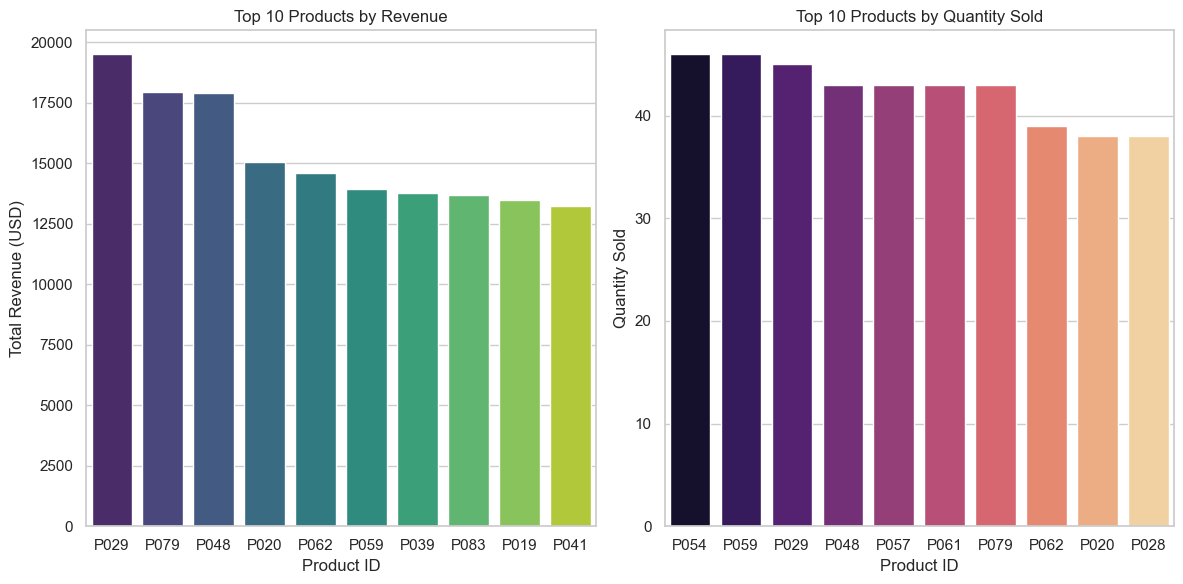

In [46]:
# Top products by revenue
top_products_revenue = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Revenue:")
print(top_products_revenue)

# Top products by quantity sold
top_products_quantity = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Products by Quantity Sold:")
print(top_products_quantity)

# Plot revenue and quantity
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=top_products_revenue.index, y=top_products_revenue.values, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Product ID')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
sns.barplot(x=top_products_quantity.index, y=top_products_quantity.values, palette='magma')
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product ID')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()



Revenue Distribution by Hour:
Hour
0     24981.18
1     23590.89
2     24643.42
3     31643.94
4     33147.60
5     22871.70
6     24620.36
7     27446.64
8     21127.18
9     33595.06
10    26511.34
11    27317.78
12    25761.01
13    21943.91
14    38323.60
15    25388.92
16    38455.39
17    33030.25
18    29710.35
19    32346.61
20    26132.75
21    30686.67
22    35954.94
23    30764.07
Name: TotalValue, dtype: float64


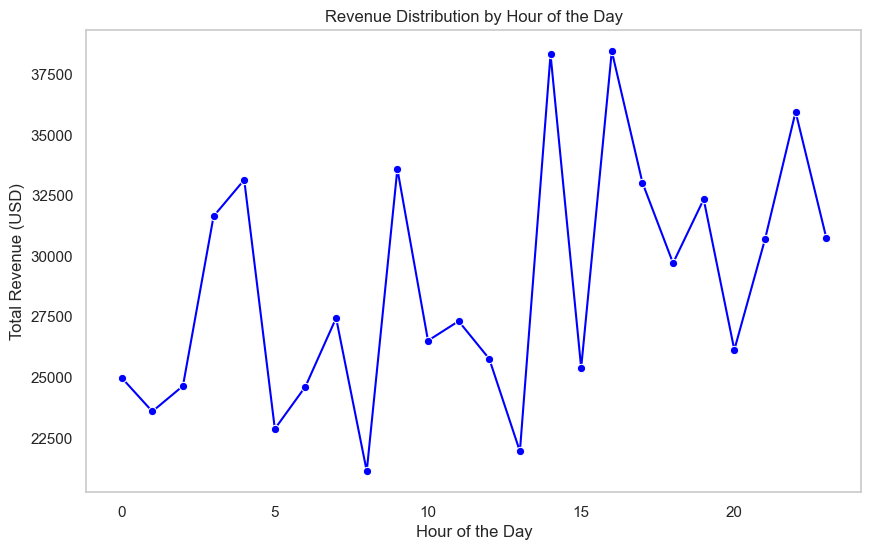

In [47]:
# Extract hour from the TransactionDate
transactions['Hour'] = transactions['TransactionDate'].dt.hour

# Revenue by hour
revenue_by_hour = transactions.groupby('Hour')['TotalValue'].sum().sort_index()
print("\nRevenue Distribution by Hour:")
print(revenue_by_hour)

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(x=revenue_by_hour.index, y=revenue_by_hour.values, marker='o', color='blue')
plt.title('Revenue Distribution by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Revenue (USD)')
plt.grid()
plt.show()

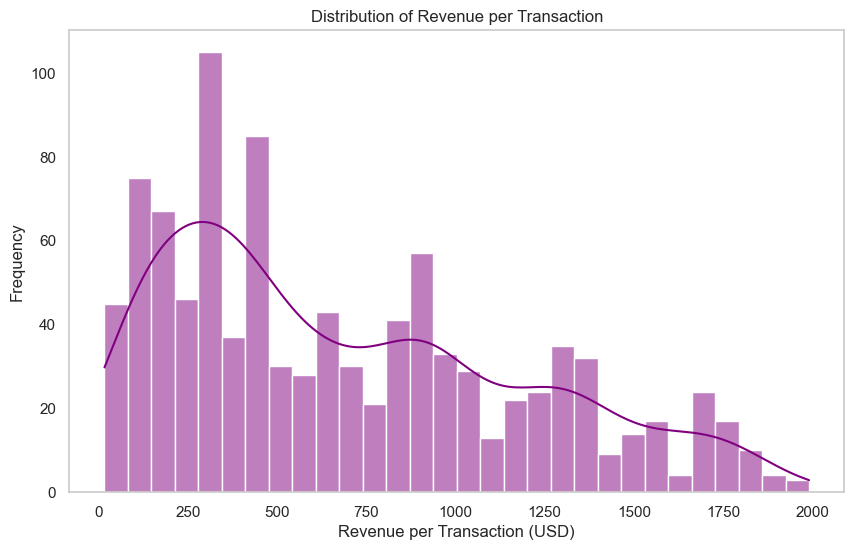

In [48]:
# Revenue per transaction histogram
plt.figure(figsize=(10, 6))
sns.histplot(transactions['TotalValue'], bins=30, kde=True, color='purple')
plt.title('Distribution of Revenue per Transaction')
plt.xlabel('Revenue per Transaction (USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [49]:
# Count the number of transactions per customer
transactions_per_customer = transactions['CustomerID'].value_counts()

# Calculate repeat customer percentage
repeat_customers = transactions_per_customer[transactions_per_customer > 1].count()
total_customers = transactions['CustomerID'].nunique()
repeat_rate = (repeat_customers / total_customers) * 100
print(f"\nPercentage of Repeat Customers: {repeat_rate:.2f}%")



Percentage of Repeat Customers: 93.97%



Top 10 Customers by Transaction Count:
CustomerID
C0109    11
C0156    11
C0008    10
C0141    10
C0175    10
C0065    10
C0075     9
C0147     9
C0084     9
C0093     9
Name: count, dtype: int64


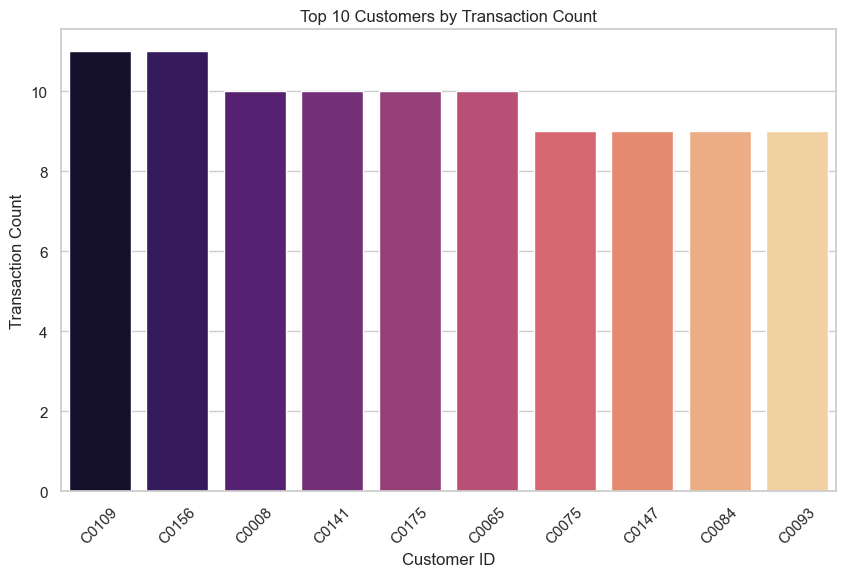

In [50]:
# Top customers by transaction count
top_customers_by_count = transactions['CustomerID'].value_counts().head(10)
print("\nTop 10 Customers by Transaction Count:")
print(top_customers_by_count)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers_by_count.index, y=top_customers_by_count.values, palette='magma')
plt.title('Top 10 Customers by Transaction Count')
plt.xlabel('Customer ID')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.show()



Product Sales Trends Over Time:
ProductID        P029  P048  P054  P057  P059
TransactionDate                              
2023-12           0.0   0.0   0.0   4.0   0.0
2024-01           0.0   3.0   6.0   7.0   9.0
2024-02           3.0   7.0   0.0   3.0   0.0
2024-03           0.0   0.0  11.0   4.0   0.0
2024-04          15.0   3.0   3.0   4.0   8.0
2024-05           1.0   9.0   0.0   6.0   7.0
2024-06           2.0   6.0   0.0   0.0   5.0
2024-07           6.0   0.0   4.0   8.0   7.0
2024-08           0.0   5.0  12.0   3.0   0.0
2024-09          12.0   4.0   3.0   0.0   3.0
2024-10           0.0   0.0   0.0   0.0   6.0
2024-11           3.0   2.0   7.0   2.0   1.0
2024-12           3.0   4.0   0.0   2.0   0.0


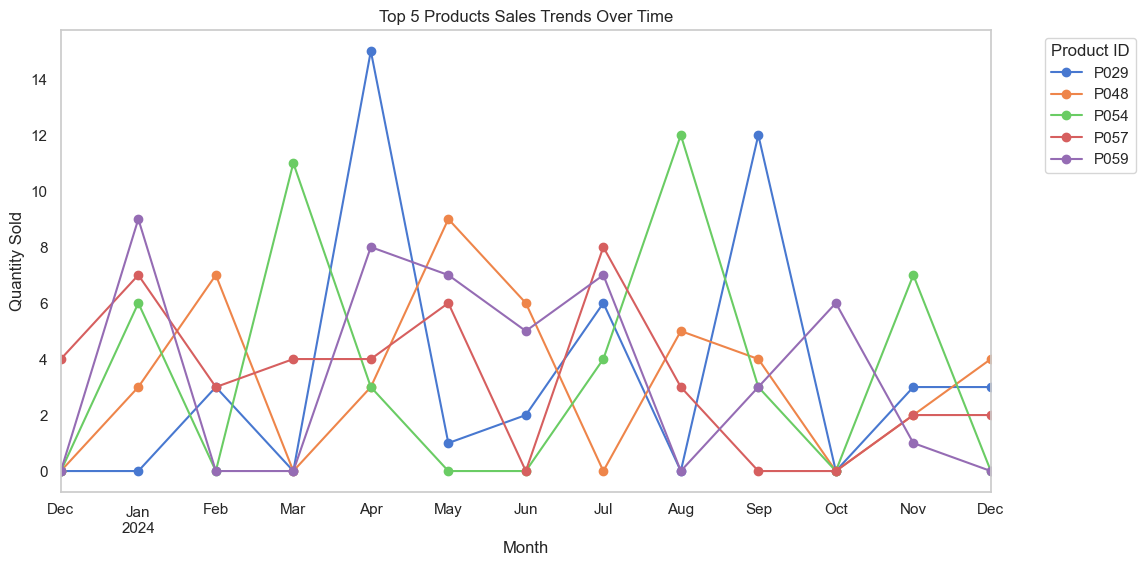

In [51]:
# Monthly sales for top 5 products by quantity
top_5_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(5).index
product_trends = transactions[transactions['ProductID'].isin(top_5_products)]
product_sales_over_time = product_trends.groupby([product_trends['TransactionDate'].dt.to_period('M'), 'ProductID'])['Quantity'].sum().unstack().fillna(0)

print("\nProduct Sales Trends Over Time:")
print(product_sales_over_time)

# Plot
product_sales_over_time.plot(figsize=(12, 6), marker='o')
plt.title('Top 5 Products Sales Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Quantity Sold')
plt.legend(title='Product ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()



Revenue Contribution by Category:
Category
Books          192147.47
Electronics    180783.50
Clothing       166170.66
Home Decor     150893.93
Name: TotalValue, dtype: float64


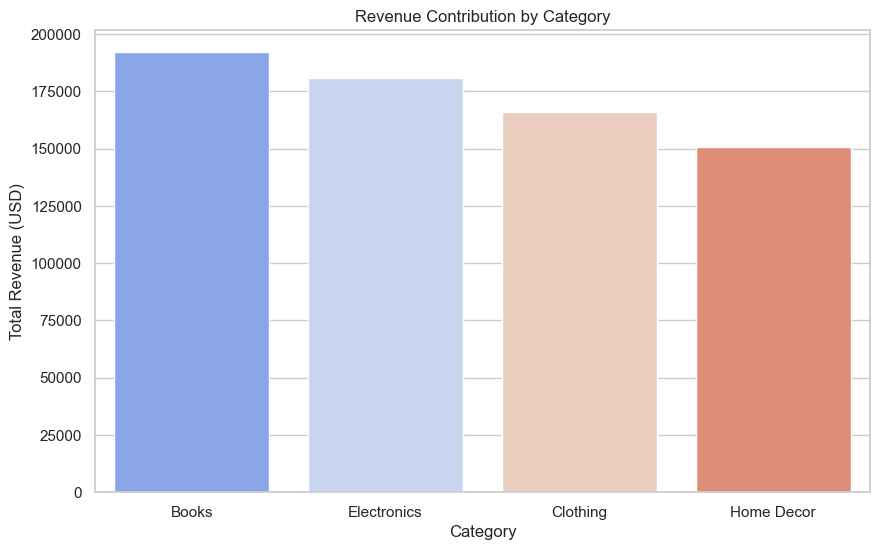

In [52]:
# Merge transactions with products to get categories
merged_data = transactions.merge(products, on='ProductID', how='left')

# Revenue by category
revenue_by_category = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
print("\nRevenue Contribution by Category:")
print(revenue_by_category)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=revenue_by_category.index, y=revenue_by_category.values, palette='coolwarm')
plt.title('Revenue Contribution by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=0)
plt.show()


# Thank You!